Plotting sp500

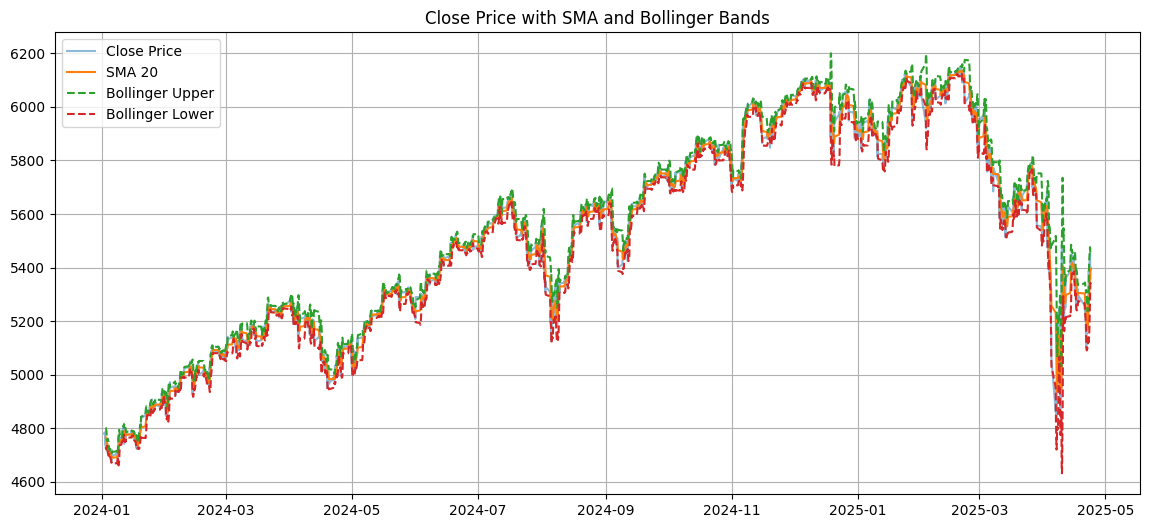

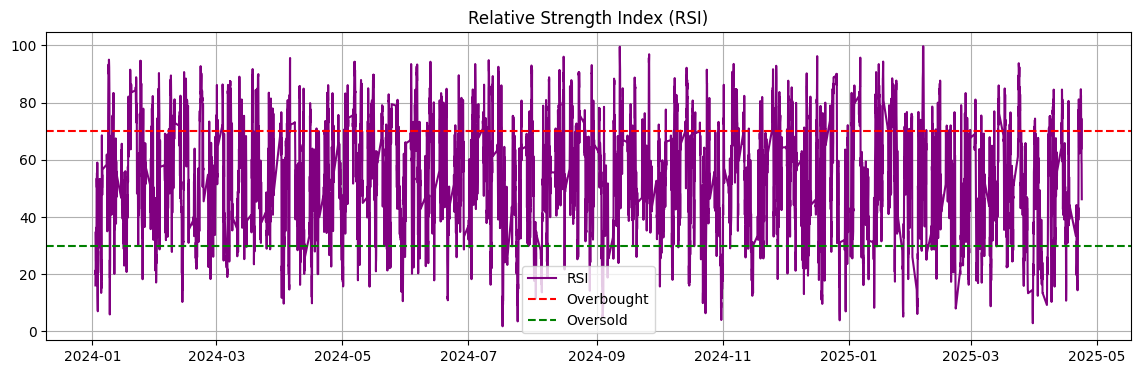

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

base_dir = os.getcwd()
csv_path = os.path.abspath(os.path.join(base_dir, "..", "data", "sp500_hist.csv"))
df = pd.read_csv(csv_path)

df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime')
df.set_index('datetime', inplace=True)

# Indicators
df['SMA_20'] = df['close'].rolling(window=20).mean()
df['EMA_10'] = df['close'].ewm(span=10, adjust=False).mean()

delta = df['close'].diff()
gain = delta.where(delta > 0, 0).rolling(window=14).mean()
loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

rolling_std = df['close'].rolling(window=20).std()
df['BB_upper'] = df['SMA_20'] + (rolling_std * 2)
df['BB_lower'] = df['SMA_20'] - (rolling_std * 2)

#Plotting close price with SMA and Bollinger Bands
plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='Close Price', alpha=0.5)
plt.plot(df['SMA_20'], label='SMA 20')
plt.plot(df['BB_upper'], label='Bollinger Upper', linestyle='--')
plt.plot(df['BB_lower'], label='Bollinger Lower', linestyle='--')
plt.title("Close Price with SMA and Bollinger Bands")
plt.legend()
plt.grid(True)
plt.savefig("sp500_sma_bollinger_chart.png")
plt.show()

# Relative strength index plot
plt.figure(figsize=(14, 4))
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title("Relative Strength Index (RSI)")
plt.legend()
plt.savefig("spt500_rsi_chart.png")
plt.grid(True)
plt.show()


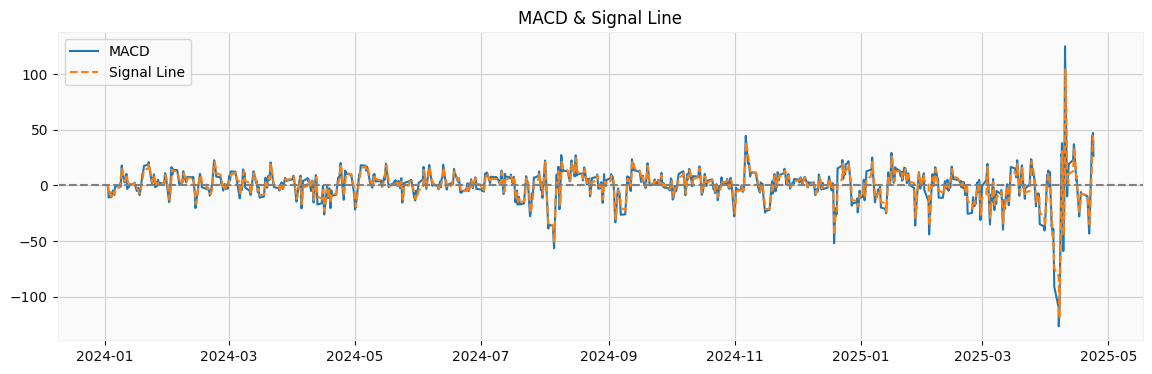

In [23]:
df['EMA_12'] = df['close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(14, 4))
plt.plot(df['MACD'], label='MACD')
plt.plot(df['MACD_signal'], label='Signal Line', linestyle='--')
plt.axhline(0, color='gray', linestyle='--')
plt.title('MACD & Signal Line')
plt.legend()
plt.grid(True)
plt.savefig("sp500_macd_chart.png")
plt.show()


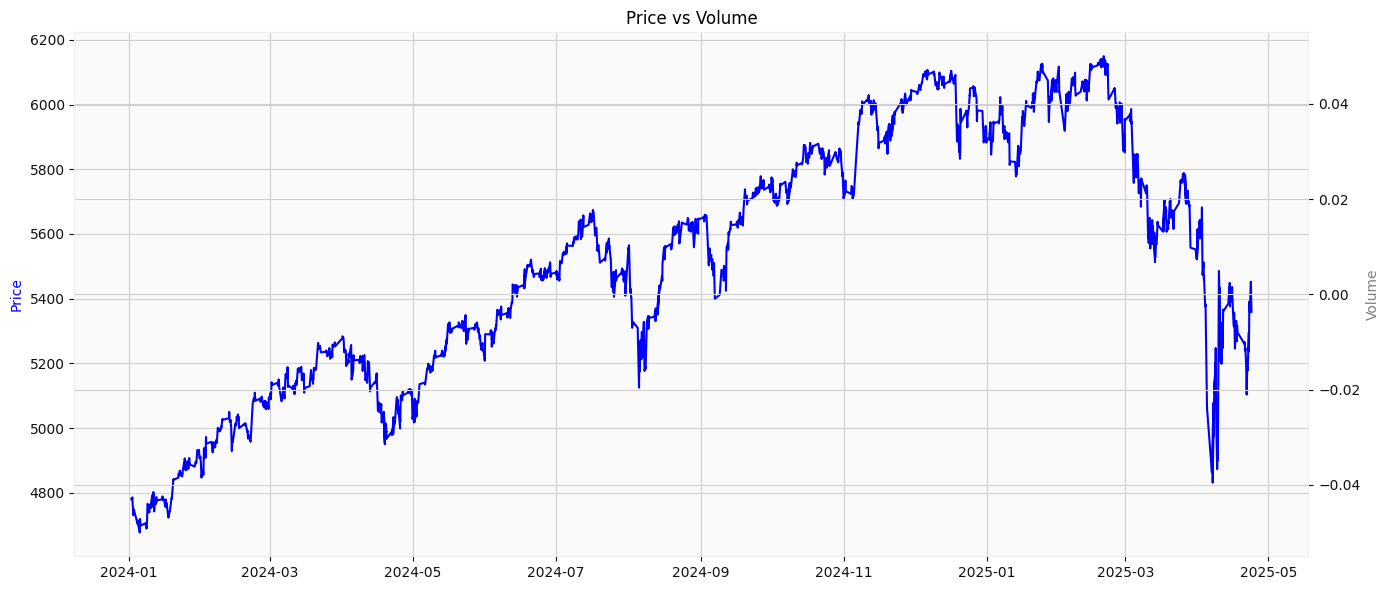

In [22]:
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(df['close'], label='Close Price', color='blue')
ax1.set_ylabel('Price', color='blue')
ax2 = ax1.twinx()
ax2.bar(df.index, df['volume'], label='Volume', color='gray', alpha=0.3)
ax2.set_ylabel('Volume', color='gray')
plt.title("Price vs Volume")
fig.tight_layout()
fig.savefig("sp500_price_volume_chart.png")

plt.show()


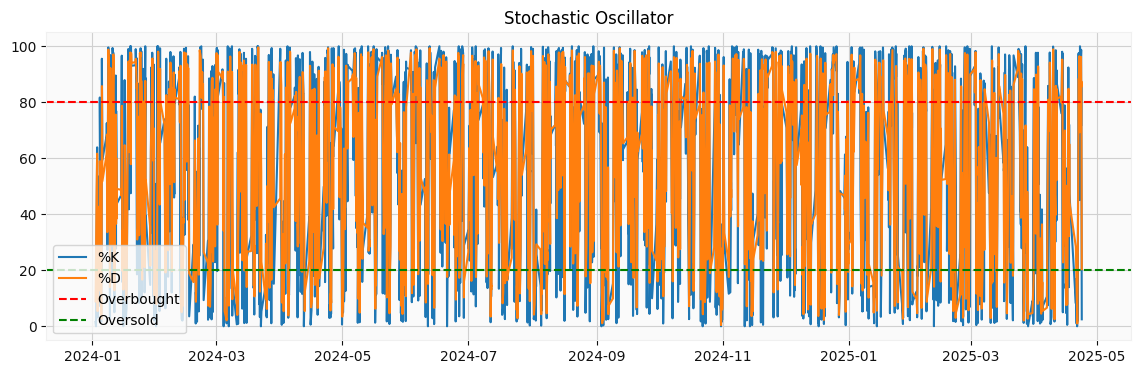

In [25]:
low_14 = df['low'].rolling(window=14).min()
high_14 = df['high'].rolling(window=14).max()
df['%K'] = 100 * (df['close'] - low_14) / (high_14 - low_14)
df['%D'] = df['%K'].rolling(window=3).mean()

plt.figure(figsize=(14, 4))
plt.plot(df['%K'], label='%K')
plt.plot(df['%D'], label='%D')
plt.axhline(80, color='red', linestyle='--', label='Overbought')
plt.axhline(20, color='green', linestyle='--', label='Oversold')
plt.title('Stochastic Oscillator')
plt.legend()
plt.grid(True)
plt.savefig("sp500_stochastic_oscillator.png")
plt.show()


c:\Users\alexj\nci\programming\TradingView_Project\venv\Lib\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


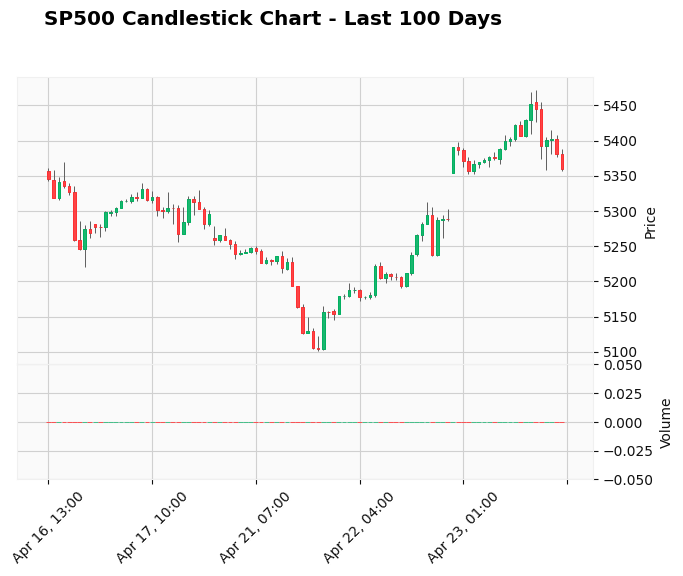

In [ ]:
mpf.plot(df.tail(100),
         type='candle',
         volume=True,
         style='yahoo',
         title='SP500 Candlestick Chart - Last 100 Days',
         warn_too_much_data=200)
         #savefig='sp500_candlestick_chart.png')